In [22]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = './data/raw'
df = pd.DataFrame()

for i in range(8):
    new_df = pd.read_csv(path+f'/Education_videos_{i}_cleaned.csv')
    new_df = new_df.dropna(axis=0)
    df = pd.concat([df, new_df])
    del(new_df)
    print(f'Imported Education_videos_{i}_cleaned.csv')

df['upload_date'] = pd.to_datetime(df['upload_date'])
df['year'] = df['upload_date'].dt.year
df['month'] = df['upload_date'].dt.month

classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(lambda x: ast.literal_eval(x))
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month


Imported Education_videos_0_cleaned.csv
Imported Education_videos_1_cleaned.csv
Imported Education_videos_2_cleaned.csv
Imported Education_videos_3_cleaned.csv
Imported Education_videos_4_cleaned.csv
Imported Education_videos_5_cleaned.csv
Imported Education_videos_6_cleaned.csv
Imported Education_videos_7_cleaned.csv


16.285601063032317 0.2962458949870938


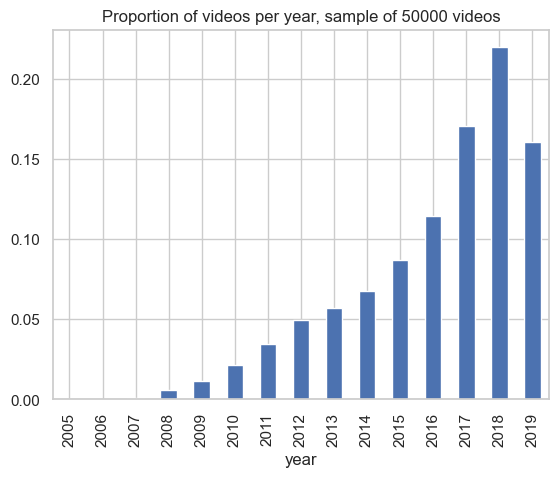

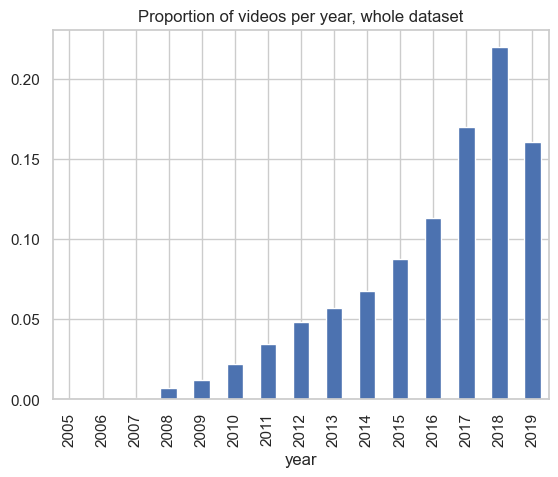

In [23]:
from scipy.stats import chisquare

fig, ax = plt.subplots(1,1)
(classified.groupby('year').size()/len(classified)).plot(kind='bar', ax=ax)
ax.set_title('Proportion of videos per year, sample of 50000 videos')

fig, ax = plt.subplots(1,1)
(df.groupby('year').size()/len(df)).plot(kind='bar', ax=ax)
ax.set_title('Proportion of videos per year, whole dataset')

sampled = classified.groupby('year').size()
complete = df.groupby('year').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

Cannot reject null hypothesis that the two distribution have the same frequencies

14.488299611094055 0.20714103096036054


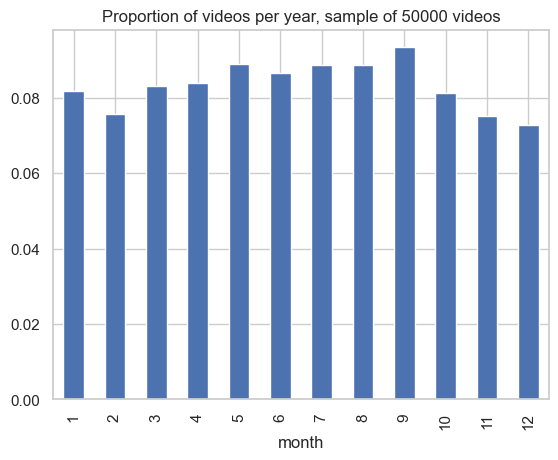

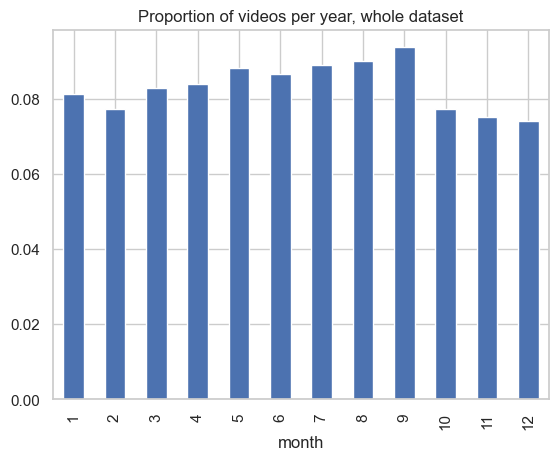

In [24]:
from scipy.stats import chisquare

fig, ax = plt.subplots(1,1)
(classified.groupby('month').size()/len(classified)).plot(kind='bar', ax=ax)
ax.set_title('Proportion of videos per year, sample of 50000 videos')

fig, ax = plt.subplots(1,1)
(df.groupby('month').size()/len(df)).plot(kind='bar', ax=ax)
ax.set_title('Proportion of videos per year, whole dataset')

sampled = classified.groupby('month').size()
complete = df.groupby('month').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

Cannot reject null hypothesis that the two distribution have the same frequencies

# Distribution across labels

Text(0.5, 1.0, 'Number of videos for each label')

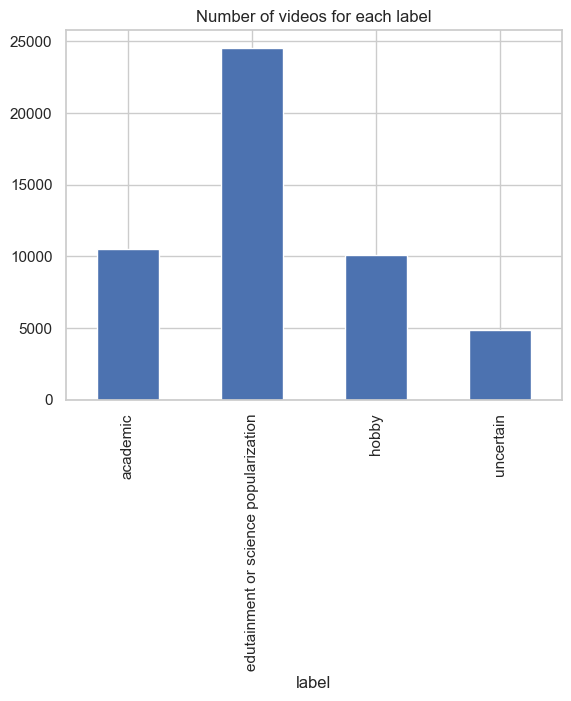

In [13]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label').size().plot(kind='bar', ax=ax)
ax.set_title('Number of videos for each label')


> Significantly more Edutainement videos than for the other labels. Align with the hypothesis that edutainement became very popular on youtube and that it is the main source of educational content

# Categories across years


Text(0.5, 1.0, 'Proportion of each video type per year')

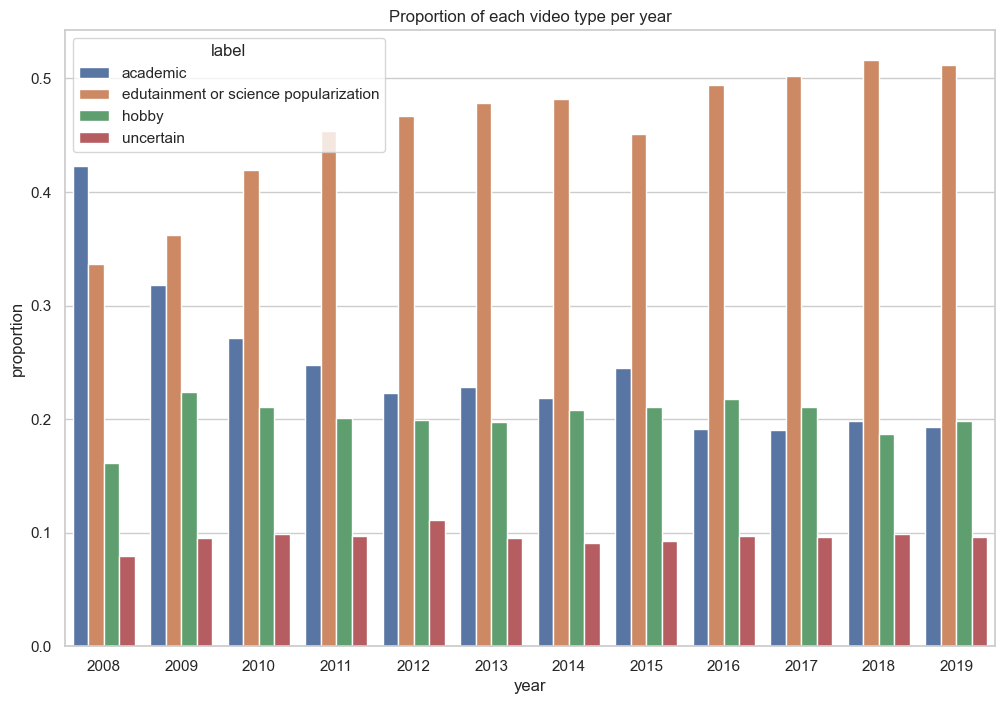

In [14]:
import seaborn as sns
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2020)
classified = classified[classified['year'].isin(years)]

# Compute proportion per year for each label
count_per_year_label = classified.groupby(['year', 'label']).size().unstack(fill_value=0)
proportion_per_year = count_per_year_label.div(count_per_year_label.sum(axis=1), axis=0)

# Convert for seaborn
proportion_long = proportion_per_year.reset_index().melt(id_vars='year', value_name='proportion', var_name='label')

# Plot
sns.set_theme(style="whitegrid")
palette = sns.color_palette("deep", 4)  # 4 distinct colors from the Set2 palette
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.barplot(data=proportion_long, x='year', y='proportion', hue='label', ax=ax, palette=palette)
ax.set_title('Proportion of each video type per year')


> We can observe a decline of the academic videos for the benefit of edutainment videos.

> There is a noticable increase of edutainment videos from 2008 to 2013, suggesting that edutainment became popular in the early years of youtube.
> The early rise in popularity could reflect the novelty of the platform and the unmet demand for accessible educational content.
> The slower growth in later years might suggest a maturation of the YouTube ecosystem, where edutainment became an established genre.

> We see that academic videos became less and less popular reaching a plateau at around 2011, reaching a plateau. We could argue that youtube introduced a new type of educational content that is easier to consume and fits YouTube’s informal and entertainment-focused culture better.

> The transition from academic to edutainment content reflects changing consumer preferences. Viewers on YouTube may prefer content that simplifies complex topics, incorporates storytelling, and uses visuals and humor to maintain engagement.

# Academic videos

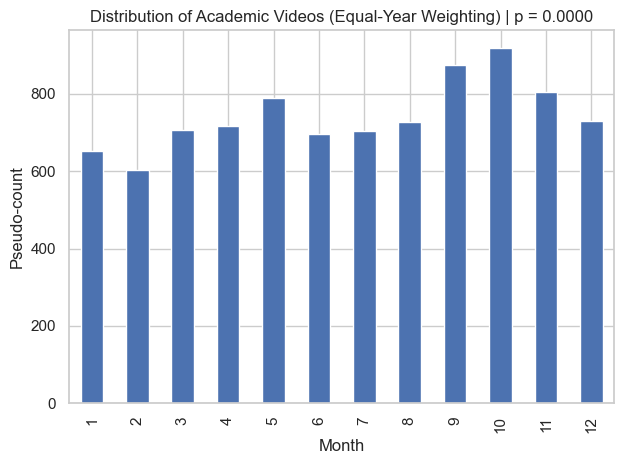

In [15]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2020)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'academic']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)
complete_years = monthly_counts[(monthly_counts > 0).all(axis=1)].index
complete = academic[academic['year'].isin(complete_years)]

# Compute monthly proportions per year (each year sums to 1.0)
year_month_counts = complete.groupby(['year', 'month']).size().unstack(fill_value=0)
year_month_proportions = year_month_counts.div(year_month_counts.sum(axis=1), axis=0)

# Assign a fixed total number of pseudo-videos per year (M)
M = len(complete) / len(complete_years)

# Convert each year's proportions to pseudo-counts
pseudo_counts_per_year = (year_month_proportions * M).round().astype(int)

# Sum pseudo-counts across all complete years to get final observed counts per month
observed = pseudo_counts_per_year.sum(axis=0)

# Perform chi-square test
chi_stat, p_value = chisquare(observed)

# Plot the results
fig, ax = plt.subplots(1, 1)
observed.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Pseudo-count')
ax.set_title(f'Distribution of Academic Videos (Equal-Year Weighting) | p = {p_value:.4f}')
plt.tight_layout()
plt.show()


> p_value < 0.05, we an reject the null hypothesis that the distribution is uniform across the months

> There is a clear distribution difference across the months. By looking at the distribution, we see that there is a peak in september and may. Even if we cannot say for sure that this is the case, we could hypothesize that these peaks corresponds to the start of the school year, and to the exam periods.

# Edutainement videos

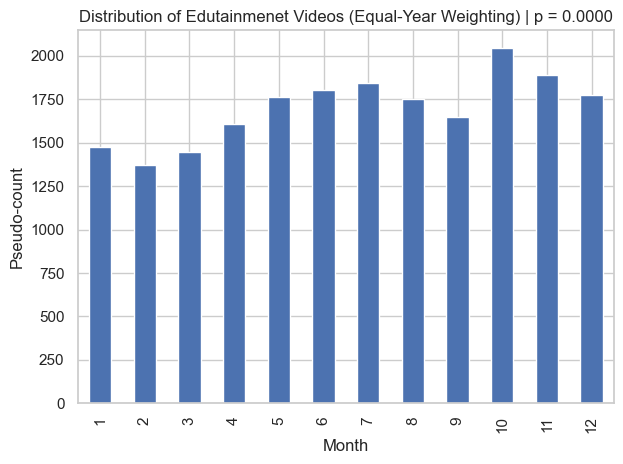

In [16]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2020)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'edutainment or science popularization']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)
complete_years = monthly_counts[(monthly_counts > 0).all(axis=1)].index
complete = academic[academic['year'].isin(complete_years)]

# Compute monthly proportions per year (each year sums to 1.0)
year_month_counts = complete.groupby(['year', 'month']).size().unstack(fill_value=0)
year_month_proportions = year_month_counts.div(year_month_counts.sum(axis=1), axis=0)

# Assign a fixed total number of pseudo-videos per year (M)
M = len(complete) / len(complete_years)

# Convert each year's proportions to pseudo-counts
pseudo_counts_per_year = (year_month_proportions * M).round().astype(int)

# Sum pseudo-counts across all complete years to get final observed counts per month
observed = pseudo_counts_per_year.sum(axis=0)

# Perform chi-square test
chi_stat, p_value = chisquare(observed)

# Plot the results
fig, ax = plt.subplots(1, 1)
observed.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Pseudo-count')
ax.set_title(f'Distribution of Edutainmenet Videos (Equal-Year Weighting) | p = {p_value:.4f}')
plt.tight_layout()
plt.show()


> While the distribution is not perfectly uniform (as indicated by the chi-square test), it is more balanced compared to the academic videos.

> This could indicate that edutainment videos are less dependent on specific seasonal patterns and maintain relevance throughout the year. This contrasts with purely academic videos, which might be tied more closely to school terms and exam cycles.


# Hobby videos

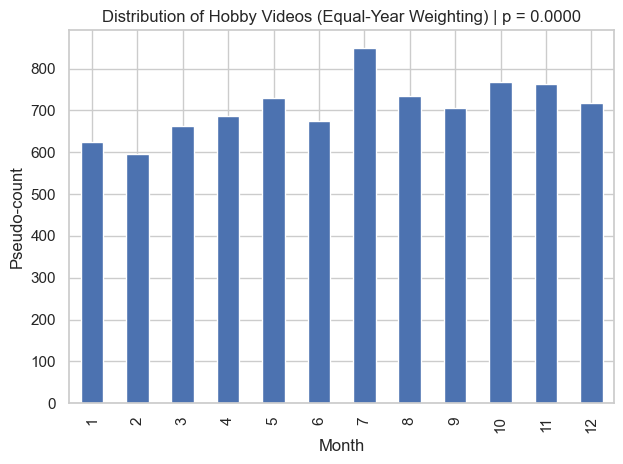

In [17]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2020)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'hobby']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)
complete_years = monthly_counts[(monthly_counts > 0).all(axis=1)].index
complete = academic[academic['year'].isin(complete_years)]

# Compute monthly proportions per year (each year sums to 1.0)
year_month_counts = complete.groupby(['year', 'month']).size().unstack(fill_value=0)
year_month_proportions = year_month_counts.div(year_month_counts.sum(axis=1), axis=0)

# Assign a fixed total number of pseudo-videos per year (M)
M = len(complete) / len(complete_years)

# Convert each year's proportions to pseudo-counts
pseudo_counts_per_year = (year_month_proportions * M).round().astype(int)

# Sum pseudo-counts across all complete years to get final observed counts per month
observed = pseudo_counts_per_year.sum(axis=0)

# Perform chi-square test
chi_stat, p_value = chisquare(observed)

# Plot the results
fig, ax = plt.subplots(1, 1)
observed.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Pseudo-count')
ax.set_title(f'Distribution of Hobby Videos (Equal-Year Weighting) | p = {p_value:.4f}')
plt.tight_layout()
plt.show()